# Fraunhofer


In [ ]:
def field_at(x, screen):
    r = np.norm2(z - x)
    sci[y.integrate2d( lambda z: ( np.exp(1.j*k * r) / r), [-1,1], [-1,1])


def image():
    



(array([ 0.01838432-1.04718783e-01j, -0.0596982 +9.29629615e-02j,
         0.11325276+1.92595853e-02j,  0.0656778 -9.98708394e-02j,
         0.03529957-1.19346341e-01j,  0.10223511-7.97739992e-02j,
         0.08103573+1.08235164e-01j, -0.12954619-5.58708094e-02j,
         0.08196863+1.22403534e-01j,  0.14037257-6.31829187e-02j,
         0.13407154-8.90974207e-02j,  0.14164342+9.11997122e-02j,
        -0.17643137-6.98210846e-05j,  0.10949975+1.49003212e-01j,
         0.18244753+6.57647985e-02j,  0.01767794+2.02779237e-01j,
        -0.05000149-2.07846479e-01j, -0.22451167-8.06694101e-03j,
        -0.15062788-1.81965619e-01j,  0.15676862+1.92805036e-01j,
         0.25381859+6.29198772e-02j, -0.18010601+2.08136814e-01j,
         0.16929432+2.35103337e-01j, -0.28231405+1.15102004e-01j,
        -0.03788774+3.18415122e-01j, -0.12677749-3.12189190e-01j,
        -0.00212737-3.53546800e-01j, -0.36984654-1.60910271e-02j,
         0.38173274+6.03814287e-02j, -0.27966533+2.88549443e-01j,
        -0

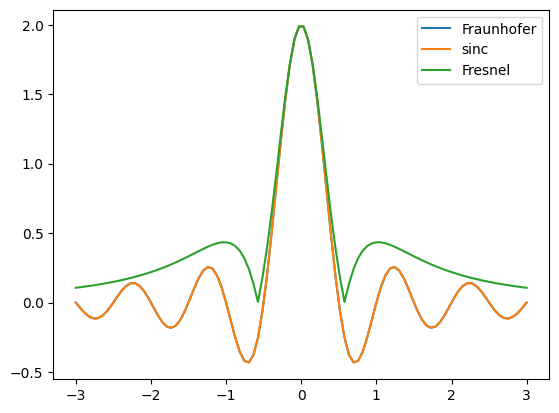

In [39]:
#frauhofer
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def fraun(screen):
   lam = 1
   k = 2 * np.pi / lam
   def res(l):
        return integrate.quad_vec( lambda x: np.exp(1.j * k * l * x) * screen(x), -2, 2)
   return res

def fresn(screen, z):
   lam = 1
   k = 2 * np.pi / lam
   def res(x1):
        return integrate.quad_vec( lambda x: np.exp(1.j * k * np.sqrt((x1 - x)**2 + z**2)) * screen(x), -2, 2)
   return res



# l = x1 / z

slit_pat = fraun(lambda x : 1 if -1 <= x <= 1 else 0)
z = 1000
fresn_pat = fresn(lambda x : 1 if -1 <= x <= 1 else 0, z)
xs = np.linspace(-3,3,100) 
pat, err = slit_pat(xs)
plt.plot(xs, pat, label="Fraunhofer")
plt.plot(xs, 2*np.sinc(2*xs), label="sinc")
plt.plot(xs, np.abs(fresn_pat(xs*z)[0]), label="Fresnel")
plt.legend()
fresn_pat(xs*z)


In [81]:
import sympy as sp
x1, x, z, k, l = sp.symbols('x1 x z k l')
sp.exp(1.j * k * sp.sqrt((x1 - x)**2 + z**2))
expr1 = z*sp.sqrt(((x1 - x)**2 + z**2) / z**2)
#expr1_expansion = expr1.series(x1/z, 0, 5).removeO()
#expr1_expansion
expr1.expand()
# manual elimination
e2 = expr1.replace(x1, x + l*z).simplify() # replace(z, (x1-x)/l).
e2
#e2.series(l, 0, 3)
#expr1.expand().series(x1/z, 0, 5)
x1subst = sp.solve(sp.Eq(l, (x1 - x) / z),x1)[0]
e2 = expr1.subs(x1, x1subst).simplify()
e3 = e2.series(l,0,3)
e3.subs(l, (x1 - x)/z).expand()

z + x1**2/(2*z) - x*x1/z + x**2/(2*z) + O(x**3/z**3 + x**2*x1/z**3 + x*x1**2/z**3 + x1**3/z**3, x, x1, z)

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sympy.abc import x, y, z, k, r
x0,y0,z0 = sp.symbols("x0 y0 z0")
dr = sp.sqrt((x-x0)**2 + (y-y0)**2 + (z-z0)**2)
r = sp.sqrt(x**2 + y**2 + z**2)
G = sp.exp(1.j * k * dr) / dr
G
G = sp.lambdify([x,y,z,x0,y0,z0,k], G)
sp.Matrix()

G(1,1,1,0,0,0,1)
# actually lambdifying inside is probablyt best. To partial eval
def field_at(x, screen):
    x0,y0,z0 = sp.symbols("x0 y0 z0")
    r = sp.sqrt((x[0]-screen[0])**2 + (x[1]-screen[1])**2 + (x[2]-)**2)
    phi = sp.lambdify([x0,y0], G, "numpy")
    return integrate.quad2(lambda z: (np.exp(1.j*k * r) / r), -1, 1, -1, 1)





(-0.09269736076625211+0.569860099182514j)

arago spot
That sommerfeld thing about disc far away
fourier optic stuff
stoachastic optic
paraxial

cernike theorem
white light


Instead of working from finite difference, it's kind of fun to work from intergation of closed form solutions.
How to deal with edges?
How to deal with t -> 0
steepest descent? using optimize.
Fused together

https://www.mathpages.com/home/kmath242/kmath242.htm cody said 2-d vs 3-d have echopes?


functional approaches to topics. Functional Programming in Learning Electromagnetic Theory
https://arxiv.org/abs/2407.08090 Walck also has physics, quantum, and others.

https://scipython.com/blog/the-two-dimensional-wave-equation/


Configurations of charge. Straightforward. Its the boundary condition stuff that feels crazier.

psi_n+1 = psi0 + \int H psi_n

https://github.com/chebpy/chebpy
https://github.com/pychebfun/pychebfun
https://github.com/dlfivefifty/ApproxFun.jl
https://www.chebfun.org/about/projects.html

I might be overcomplicating things.

I thought chebfun was kind of interesting as a closure analog. The params are kind of closed over entities. Higher order auto diff needs to differentiate with resapect othe params. There isn't an issue once you first orderize

Numerical Path integrals.





# Chebfun

In [ ]:
# let's make a toy chebfun
class Fun():
    # trasnformation to unit interval
    # maybe transform needs to be symbolic. I need it's derivatives.
    #transform = lambda np.arctan(x) / np.pi
    #untransform = lambda x: np.tan(np.pi * x)
    #symbolic = 
    coeff
    def __call__(self, x): 


In [ ]:
def prop_small_t(psi0, t):
    psi = psi0
    for i in range(10):
        # hmm. I don't like this diff2
        psi = psi0 + quad( diff2()   , 0, t)


# quantum propagator closed form
def prop(psi, t):
    def res(x):
        return scipy.integrate(lambda x1 : psi(x) * np.exp(1.j * np.norm2(x - x1) / t, [-1,1]))
    return res
# heat kernel



# born series.



In [1]:
import sympy as sp
x,x0,t = sp.symbols("x x0 t")

G = sp.exp(-(x-x0)**2 / t) / sp.sqrt(t)
def L(psi):
    return psi.diff(x0,2) - 4*psi.diff(t)

print(G.diff(x0,2).simplify())
print(G.diff(t).simplify())

L(G).simplify()

2*(-t + 2*(x - x0)**2)*exp(-(x - x0)**2/t)/t**(5/2)
(-t/2 + (x - x0)**2)*exp(-(x - x0)**2/t)/t**(5/2)


0

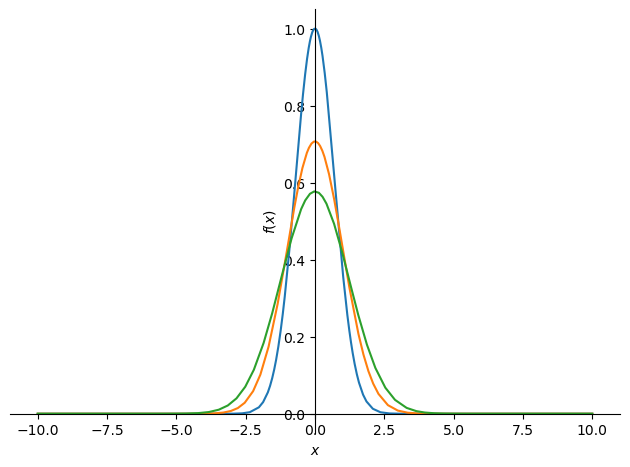

In [10]:
from matplotlib import pyplot as plt
psi = G.subs(x0, 0)
p = sp.plot(*[psi.subs(t, t1) for t1 in range(1,4)], (x,-10,10), show=False)
p.show()


In [35]:
r = sp.MatrixSymbol("r", 3, 1)
rvec = sp.Matrix(sp.symbols("x y z"))
defns = {
    r : rvec
}
sp.Eq(r,rvec)

r[1]
# https://docs.sympy.org/latest/modules/tensor/array_expressions.html
from sympy.tensor.array.expressions import ArraySymbol
A = ArraySymbol("A", (3, 2, 4))
A
r = ArraySymbol("r", (3,))
t.dot

# https://reference.wolfram.com/language/guide/SymbolicTensors.html


AttributeError: 'Symbol' object has no attribute 'dot'

# Declan's Problem

Random sources of light from parts of the sun. Why don't they tend to add up to zero?

Or the antagonistic version of a game. Given a point, I can find another point the negates it. Why doesn't that go on forever?



# aestehtic plotting
https://github.com/profConradi/Python_Simulations/blob/01570d281a2bfdfb4c18d3feeb38150c9b74c449/Nice_orbits.ipynb
Hmm histogram2s

Second derivative with respect to x0: 2*(-t + 2*(x - x0)**2)*exp(-(x - x0)**2/t)/t**(5/2)
First derivative with respect to t: (-t/2 + (x - x0)**2)*exp(-(x - x0)**2/t)/t**(5/2)


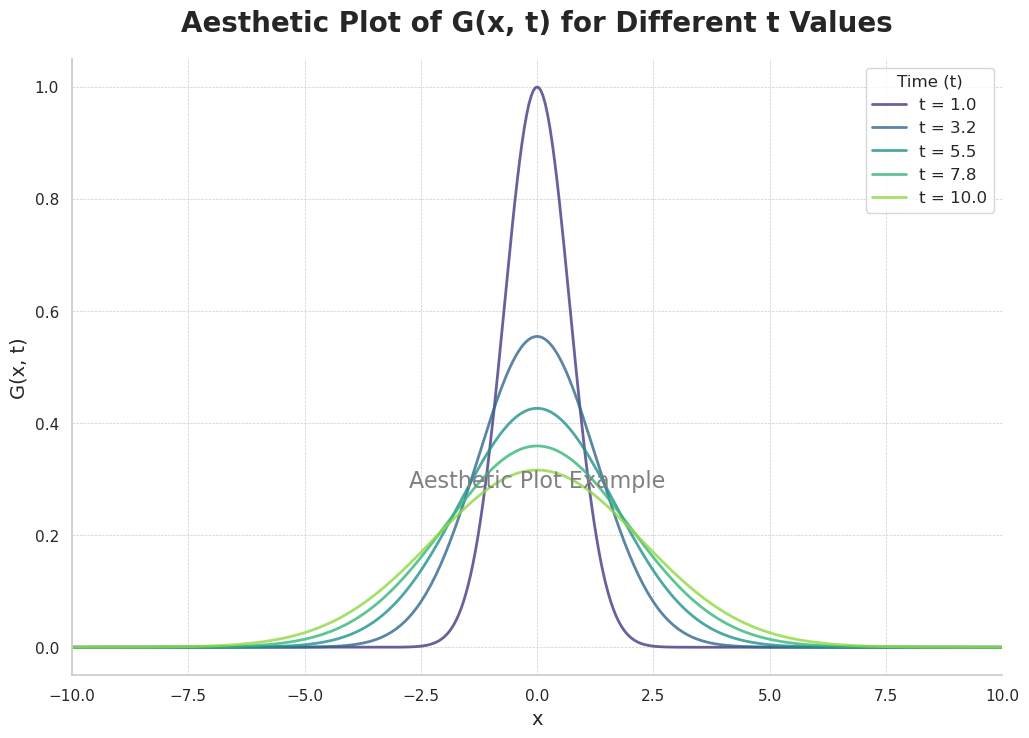

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

# Set Seaborn style for aesthetic plots
sns.set(style="whitegrid")

# Define symbolic variables and expression
x, x0, t = sp.symbols("x x0 t")
G = sp.exp(-(x - x0)**2 / t) / sp.sqrt(t)

# Define the differential operator function
def L(psi):
    return psi.diff(x0, 2) - 4 * psi.diff(t)

# Compute the second derivative with respect to x0 and first derivative with respect to t
G_x0_2 = G.diff(x0, 2).simplify()
G_t = G.diff(t).simplify()

# Print the simplified derivatives
print("Second derivative with respect to x0:", G_x0_2)
print("First derivative with respect to t:", G_t)

# Define the range for x and t values
x_vals = np.linspace(-10, 10, 400)
t_vals = np.linspace(1, 10, 5)  # Choose some t values for plotting

# Create a color palette
colors = sns.color_palette("viridis", len(t_vals))

# Prepare the plot
plt.figure(figsize=(12, 8))

for i, t1 in enumerate(t_vals):
    # Substitute t with t1 and x0 with 0 in G and generate numerical values for plotting
    G_t1 = G.subs({t: t1, x0: 0})
    G_func = sp.lambdify(x, G_t1, modules=['numpy'])
    y_vals = G_func(x_vals)
    
    # Plot the function with color and transparency
    plt.plot(x_vals, y_vals, label=f't = {t1:.1f}', color=colors[i], alpha=0.8, linewidth=2)

# Customize the plot with title, labels, legend, and grid
plt.title('Aesthetic Plot of G(x, t) for Different t Values', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('G(x, t)', fontsize=14)
plt.legend(title='Time (t)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(-10, 10)

# Remove the top and right spines
sns.despine()

# Add annotations
plt.text(0, max(y_vals) * 0.9, 'Aesthetic Plot Example', fontsize=16, color='gray', ha='center')

# Save the plot in high resolution
#plt.savefig('aesthetic_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
